In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import itertools
import nltk

from Funciones_NLP import *

import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

In [2]:
df = pd.read_pickle('viviendas_eda2.pkl')

# CONJUNTO DE DATOS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7465 entries, 0 to 7464
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Distrito                 7456 non-null   object 
 1   Barrio                   7453 non-null   object 
 2   Precio                   7465 non-null   Int64  
 3   Habitaciones             7332 non-null   Int64  
 4   Baños                    7465 non-null   Int64  
 5   Superficie               7465 non-null   Int64  
 6   Aire acondicionado       7465 non-null   bool   
 7   Amueblado                7465 non-null   bool   
 8   Armarios empotrados      7465 non-null   bool   
 9   Ascensor                 7465 non-null   bool   
 10  Balcón                   7465 non-null   bool   
 11  Calefacción              7465 non-null   bool   
 12  Garaje                   7465 non-null   bool   
 13  Jardín                   7465 non-null   bool   
 14  Piscina                 


El dataset contiene 7456 anuncios de venta de viviendas de segunda mano. Cada anuncio viene representado por un total de 23 variables.


In [4]:
df.head()

,Distrito,Barrio,Precio,Habitaciones,Baños,Superficie,Aire acondicionado,Amueblado,Armarios empotrados,Ascensor,...,Jardín,Piscina,Terraza,Año de construcción,Planta,Estado,Interior/Exterior,Tipo de calefacción,Sistema de calefacción,Calificación energética
0,Retiro,Pacífico,565000,5,2,160,False,False,True,True,...,False,False,True,NaN,3.0,Por reformar,Exterior,Gas Natural,Central,E
1,Centro,Justicia - Chueca,299990,1,1,84,False,False,False,False,...,False,False,False,NaN,NaN,Buen estado,Interior,NaN,NaN,NaN
2,Centro,Embajadores - Lavapiés,179000,1,1,57,False,False,False,False,...,False,False,False,NaN,NaN,Buen estado,Interior,NaN,NaN,NaN
3,Hortaleza,Canillas,1875000,4,5,346,True,False,True,True,...,True,True,True,2020.0,3.0,Buen estado,Exterior,Electricidad,Independiente,A
4,Hortaleza,Piovera - Conde Orgaz,1795000,4,5,291,True,True,True,True,...,False,True,True,2018.0,1.0,Buen estado,Exterior,NaN,Independiente,A


# MISSING VALUES

In [5]:
missing = df.isna().sum() / len(df) * 100
missing[missing > 0].sort_values(ascending=False)

Calificación energética    44.233088
Tipo de calefacción        43.134628
Año de construcción        30.341594
Sistema de calefacción     14.239786
Planta                     13.851306
Interior/Exterior          11.185532
Habitaciones                1.781648
Barrio                      0.160750
Distrito                    0.120563
dtype: float64


Podemos ver un ranking de las variables según el porcentaje de valores faltantes. De las 23 variables, 9 de ellas tienen algún valor faltante.


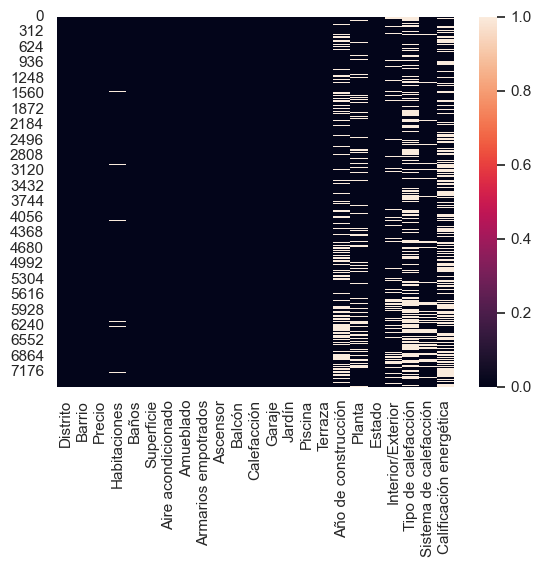

In [6]:
sns.heatmap(df.isnull(), cbar=True)
plt.show()


En este gráfico podemos apreciar que la distribuión de los valores faltantes no parece seguir ningún patrón específico. 


# DISTRIBUCIÓN DE LA VARIABLE TARGET

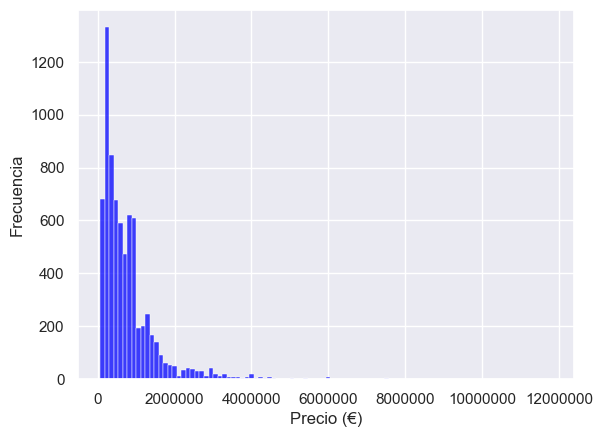

In [7]:
df['Precio'] = df['Precio'].astype('int64')
sns.histplot(df, x='Precio', color='blue', bins=100)
plt.ticklabel_format(axis='x', style='plain')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.show()

En la distribución del 'Precio' observamos como la mayor parte de los valores se encuentra en un rango más estrecho, mientras que una minoría se extiende hasta valores muy extremos, observando, por ejemplo, precios por encima de los 5 millones de €.

# DISTRIBUCIÓN DE LA SUPERFICIE DE LA VIVIENDA

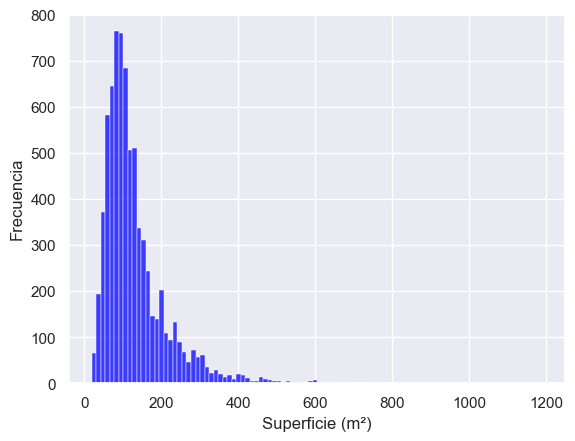

In [8]:
df['Superficie'] = df['Superficie'].astype('int64')
sns.histplot(df, x='Superficie', color='blue', bins=100)
plt.xlabel('Superficie (m²)')
plt.ylabel('Frecuencia')
plt.show()

Podemos observar una distribución muy similar a la que tiene el precio de cada vivienda.



# DISTRIBUCIÓN DEL AÑO DE CONSTRUCCIÓN


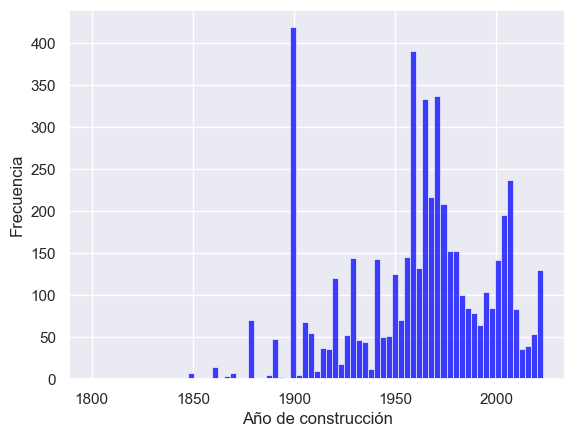

In [9]:
df_filtrado = df[(df['Año de construcción'] >= 1800) & (df['Año de construcción'] <= 2023)]
sns.histplot(df_filtrado, x='Año de construcción', color='blue', bins=75)
plt.xlabel('Año de construcción')
plt.ylabel('Frecuencia')
plt.show()

Observamos que en la distribución de los años de construcción de las viviendas, hay varios puntos que nos señalan picos de construcción durante esos años, especialmente a partir de 1.950, aunque en 1.900 hubo un 'boom' de viviendas construidas que rompe con la dinámica de esa época.

# NÚMERO DE VIVIENDAS DE SEGUNDA MANO EN VENTA POR DISTRITO

In [10]:
count = df.groupby('Distrito')['Distrito'].count().sort_values().index

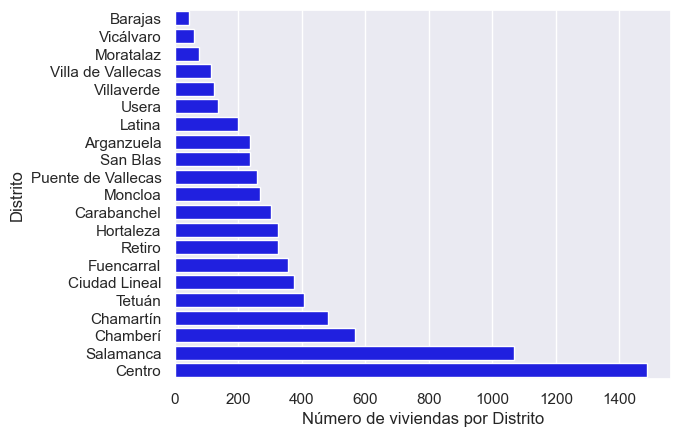

In [11]:
sns.countplot(data=df, y='Distrito', orient='h', order=count, color='blue')
plt.xlabel('Número de viviendas por Distrito')
plt.show()

Podemos observar como la oferta de estas viviendas es mayor en los distritos con mayor poder adquisitivo y situados más cerca de la zona central de Madrid.

# DISTRIBUCIÓN DEL PRECIO SEGÚN DISTRITO

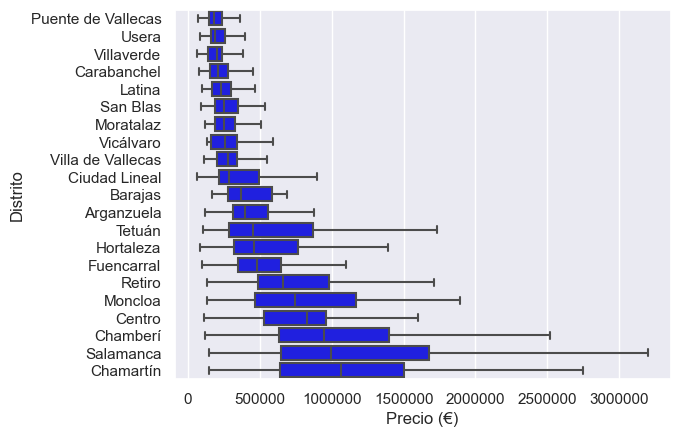

In [12]:
median_prices = df.groupby('Distrito')['Precio'].median().sort_values().index
sns.boxplot(df, y='Distrito', x='Precio', order=median_prices, orient='h', showfliers=False, color='blue')
plt.xlabel('Precio (€)')
plt.ticklabel_format(axis='x', style='plain')
plt.show()

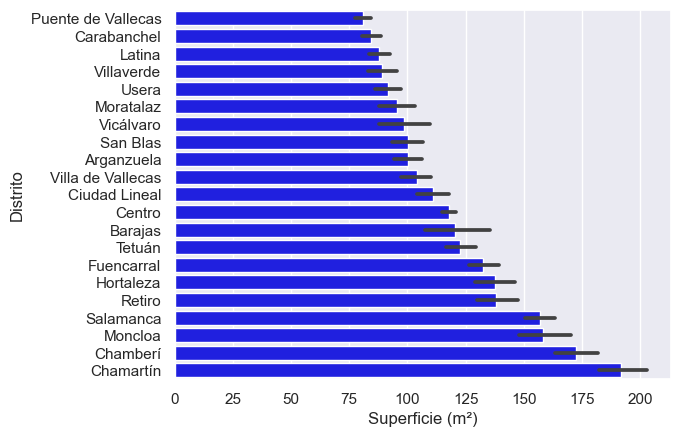

In [13]:
mean_prices = df.groupby('Distrito')['Superficie'].mean().sort_values().index
sns.barplot(df, y='Distrito', x='Superficie', order=mean_prices, orient='h', color='blue')
plt.xlabel('Superficie (m²)')
plt.show()

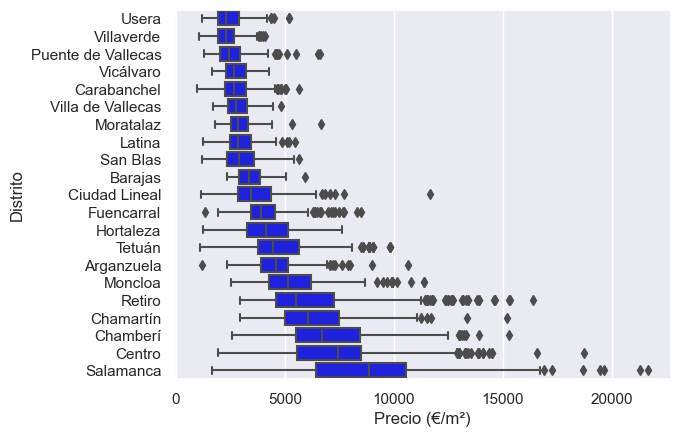

In [14]:
df['euro / m2'] = df['Precio'] / df['Superficie']
orden = df.groupby('Distrito')['euro / m2'].median().sort_values().index
sns.boxplot(df, y='Distrito', x='euro / m2', order=orden, orient='h', color='blue')
plt.xlabel('Precio (€/m²)')
plt.show()


A través de los anteriores gráficos podemos ver que:

- Analizando el precio en función de los distritos vemos como las zonas menos centrales de Madrid, tienen un precio más bajo que el resto de distritos situados en pleno Madrid.

- En los distritos con mayor poder adquisitivo las viviendas tienen una superficie mayor que en el resto de distritos.

- El precio del suelo se incrementa según nos movemos desde las zonas periféricas de Madrid a las zonas mas centrales de la ciudad.

# CORRELACIÓN ENTRE LAS VARIABLES PREDICTORAS

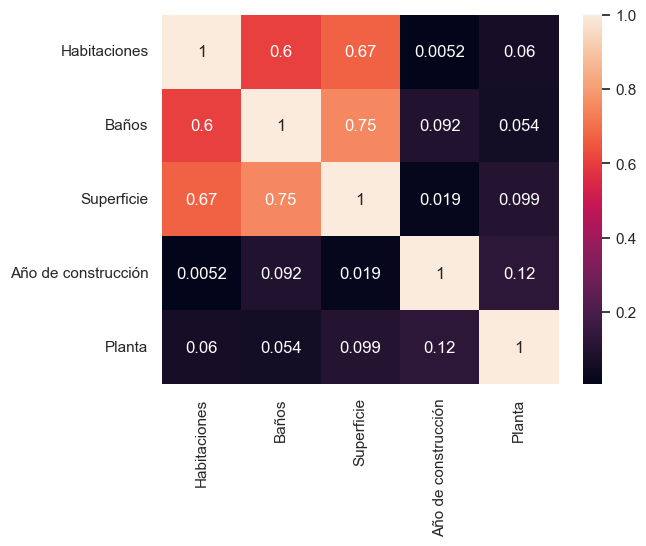

In [15]:
sns.heatmap(df.drop(columns=['Precio', 'euro / m2']).select_dtypes(include=['int', 'float']).corr().abs(), annot=True)
plt.show()


- Se muestra la matriz de correlación de las variables cuantitativas. Como es de esperar, la superficie correlaciona fuertemente con el número de estancias, tanto de baños como de habitaciones, las cuales también correlacionan considerablemente entre sí mismas.

- El resto de variables muestran una correlación ínfima entre ellas.


# CORRELACIÓN ENTRE LA VARIABLE TARGET Y LAS VARIABLES PREDICTORAS

In [16]:
correlation = df.drop(columns='euro / m2').select_dtypes(include=['int', 'float']).corr()['Precio'].abs().sort_values(ascending=False)
correlation[correlation < 1]

Superficie             0.824472
Baños                  0.703858
Habitaciones           0.444244
Año de construcción    0.134888
Planta                 0.094074
Name: Precio, dtype: float64

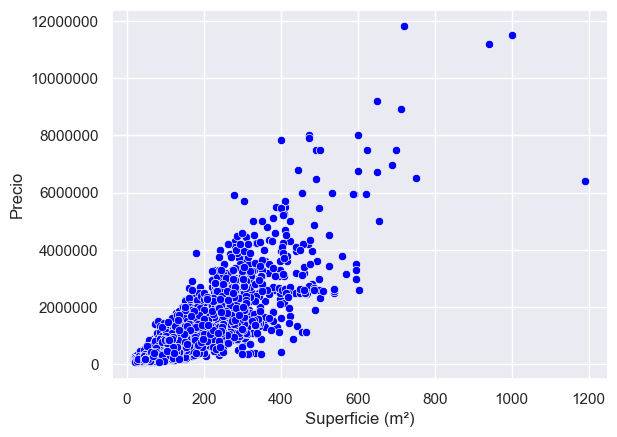

In [17]:
sns.scatterplot(data=df, x='Superficie', y='Precio', color='blue')
plt.xlabel('Superficie (m²)')
plt.ticklabel_format(style='plain')
plt.show()


- En cuanto a la correlación lineal entre el precio y las variables cuantitativas, la superficie de la vivienda es la variable que más correlaciona con el precio, siendo el número de baños la siguiente variable con mayor correlación.

- En la gráfica podemos ver con claridad la dispersión de la superficie en relación al precio, apreciándose la fuerte correlación que existe entre ellas.

### IMPUTACIÓN DE LOS VALORES FALTANTES


Tras explorar los datos decidimos imputar los valores faltantes previamente al entrenamiento del modelo de la siguiente manera:
- Variables cuantitativas ("Planta", "Año de construcción", 'Habitaciones') con la mediana.

- Variables cualitativas ("Interior/Exterior", "Sistema de calefacción", "Tipo de calefacción", "Calificación energética") con la moda.


### Variables Cuantitativas

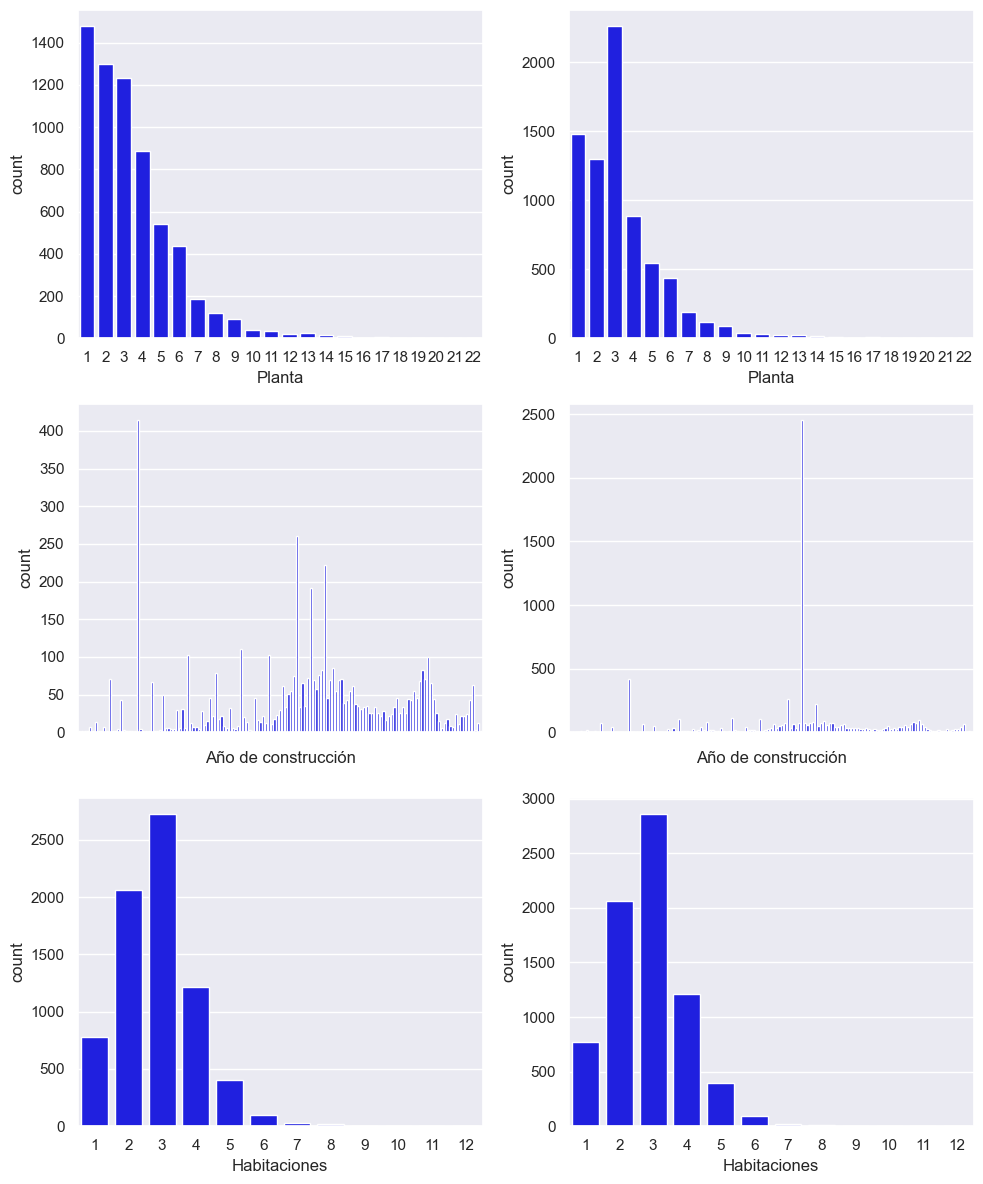

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Plot 1
axes[0, 0].set_xlabel('Planta')
sns.countplot(data=df.dropna(subset=['Planta']), x='Planta', color='blue', ax=axes[0, 0])
axes[0, 0].set_xticklabels(range(1, 23))

# Plot 2
df['Planta'] = df['Planta'].fillna(df['Planta'].median())
axes[0, 1].set_xlabel('Planta')
sns.countplot(data=df, x='Planta', color='blue', ax=axes[0, 1])
axes[0, 1].set_xticklabels(range(1, 23))

# Plot 3
axes[1, 0].set_xlabel('Año de construcción')
sns.countplot(data=df.dropna(subset=['Año de construcción']), x='Año de construcción', color='blue', ax=axes[1, 0])
axes[1, 0].set_xticklabels([]) 

# Plot 4
df['Año de construcción'] = df['Año de construcción'].fillna(df['Año de construcción'].median())
axes[1, 1].set_xlabel('Año de construcción')
sns.countplot(data=df, x='Año de construcción', color='blue', ax=axes[1, 1])
axes[1, 1].set_xticklabels([])

# Plot 5
axes[2, 0].set_xlabel('Habitaciones')
sns.countplot(data=df.dropna(subset=['Habitaciones']), x='Habitaciones', color='blue', ax=axes[2, 0])

# Plot 6
df['Habitaciones'] = df['Habitaciones'].fillna(df['Habitaciones'].median())
axes[2, 1].set_xlabel('Habitaciones')
sns.countplot(data=df, x='Habitaciones', color='blue', ax=axes[2, 1])

plt.tight_layout()
plt.show()

### Variables Cualitativas

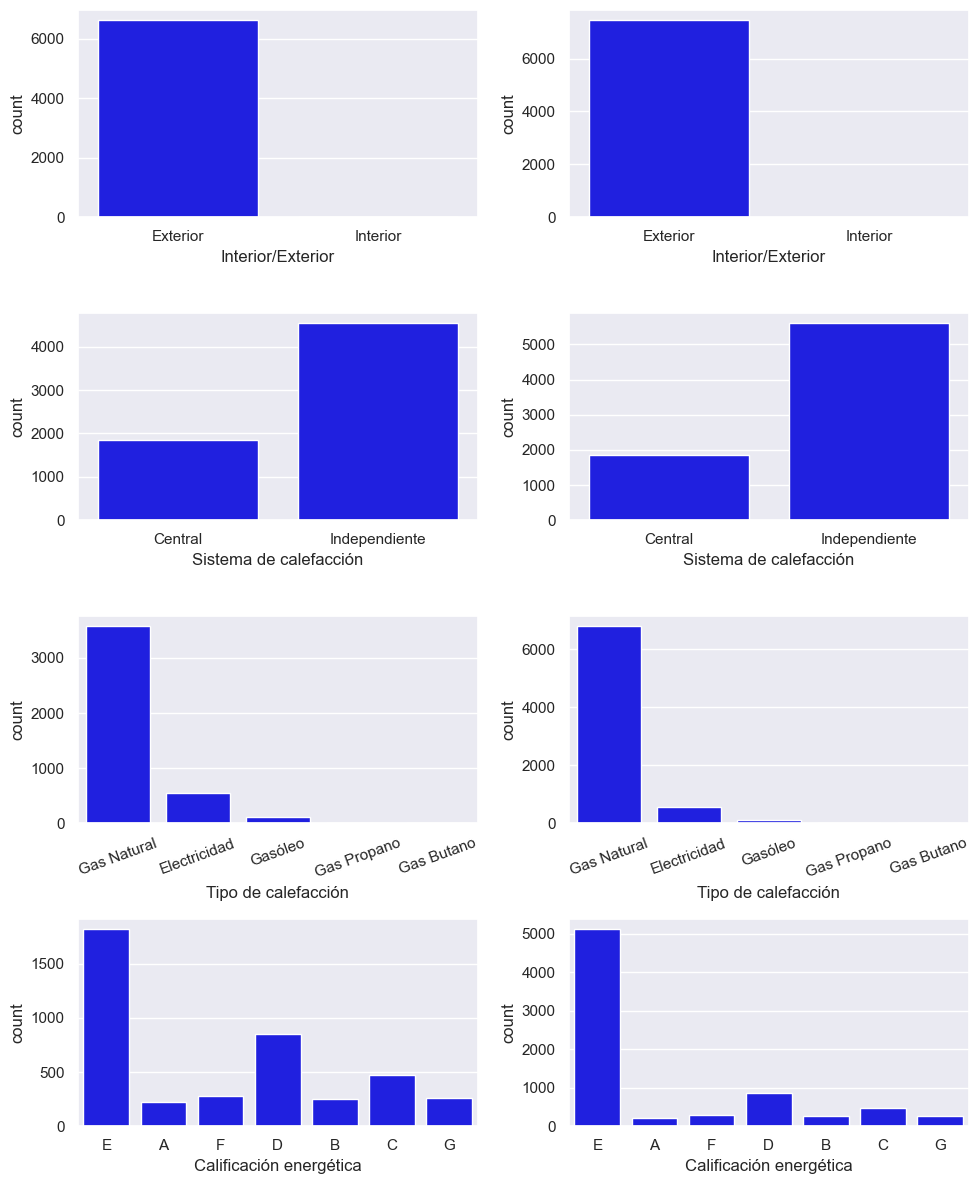

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(10, 12))

# Plot 1
axes[0, 0].set_xlabel('Interior/Exterior')
sns.countplot(data=df.dropna(subset=['Interior/Exterior']), x='Interior/Exterior', color='blue', ax=axes[0, 0])

# Plot 2
df['Interior/Exterior'] = df['Interior/Exterior'].fillna(df['Interior/Exterior'].mode()[0])
axes[0, 1].set_xlabel('Interior/Exterior')
sns.countplot(data=df, x='Interior/Exterior', color='blue', ax=axes[0, 1])

# Plot 3
axes[1, 0].set_xlabel('Sistema de calefacción')
sns.countplot(data=df.dropna(subset=['Sistema de calefacción']), x='Sistema de calefacción', color='blue', ax=axes[1, 0])

# Plot 4
df['Sistema de calefacción'] = df['Sistema de calefacción'].fillna(df['Sistema de calefacción'].mode()[0])
axes[1, 1].set_xlabel('Sistema de calefacción')
sns.countplot(data=df, x='Sistema de calefacción', color='blue', ax=axes[1, 1])

# Plot 5
axes[2, 0].set_xlabel('Tipo de calefacción')
sns.countplot(data=df.dropna(subset=['Tipo de calefacción']), x='Tipo de calefacción', color='blue', ax=axes[2, 0])
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=20)

# Plot 6
df['Tipo de calefacción'] = df['Tipo de calefacción'].fillna(df['Tipo de calefacción'].mode()[0])
axes[2, 1].set_xlabel('Tipo de calefacción')
sns.countplot(data=df, x='Tipo de calefacción', color='blue', ax=axes[2, 1])
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=20)

# Plot 7
axes[3, 0].set_xlabel('Calificación energética')
sns.countplot(data=df.dropna(subset=['Calificación energética']), x='Calificación energética', color='blue', ax=axes[3, 0])

# Plot 8
df['Calificación energética'] = df['Calificación energética'].fillna(df['Calificación energética'].mode()[0])
sns.countplot(data=df, x='Calificación energética', color='blue', ax=axes[3, 1])

plt.tight_layout()
plt.show()


# ANÁLISIS DE DESCRIPCIONES Y TÍTULOS DE LOS ANUNCIOS

In [20]:
viviendas_nlp = pd.read_csv('viviendas_nlp.csv')
viviendas_nlp.drop(columns='Unnamed: 0', inplace=True)

# Sacamos las stopwords en español
stopwords = nltk.corpus.stopwords.words('spanish')

El análisis de las siguientes variables, títulos y descripciones, se realiza con el objetivo de ver cuáles son las palabras que más se usan dentro de cada anuncio, para observar si existen patrones en las mismas.

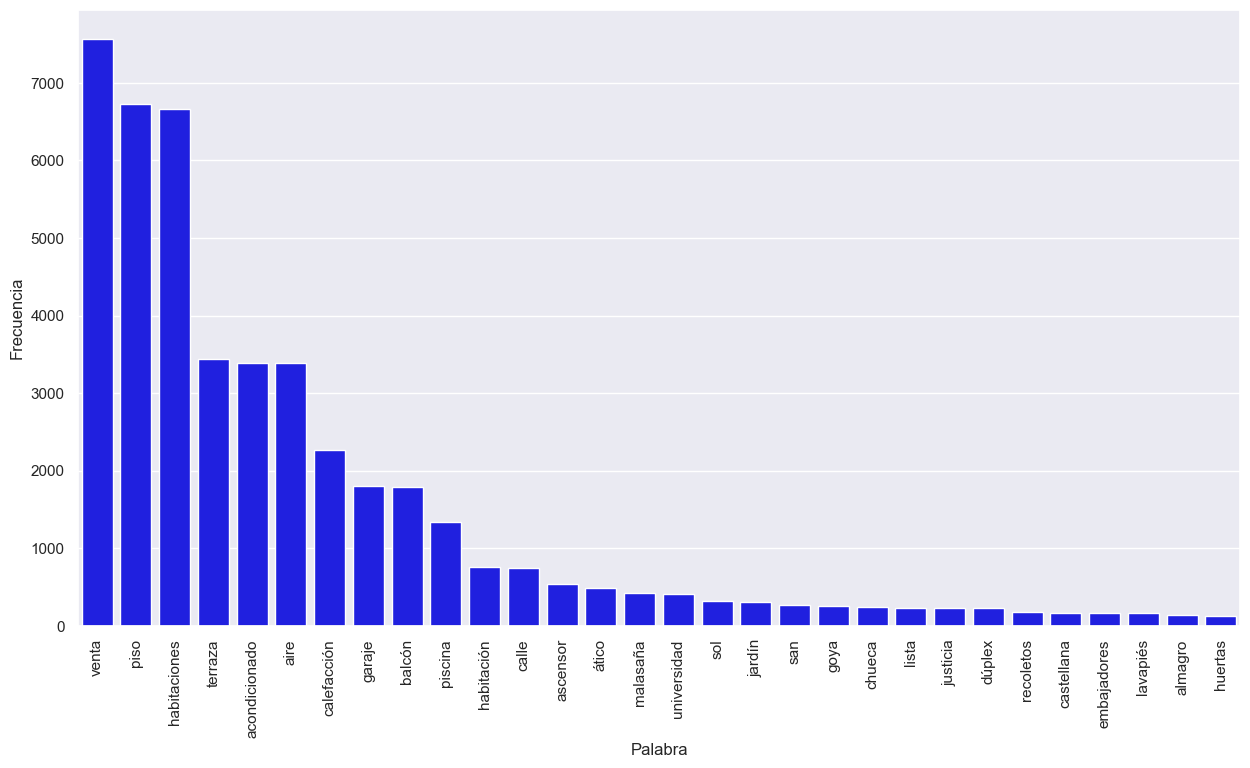

In [21]:
df_titulos = get_titulos(viviendas_nlp, stopwords)

En el análisis de los títulos observamos que hay varias palabras con mucha mayor frecuencia que el resto, lo cual nos hace pensar que el uso de algunas palabras clave como: 'Venta', 'Piso' o 'Habitaciones' puede servir para conseguir captar mejor la atención de los compradores a través de un titular vistoso, con la suficiente información como para lograr que se interese por la vivienda en cuestión.

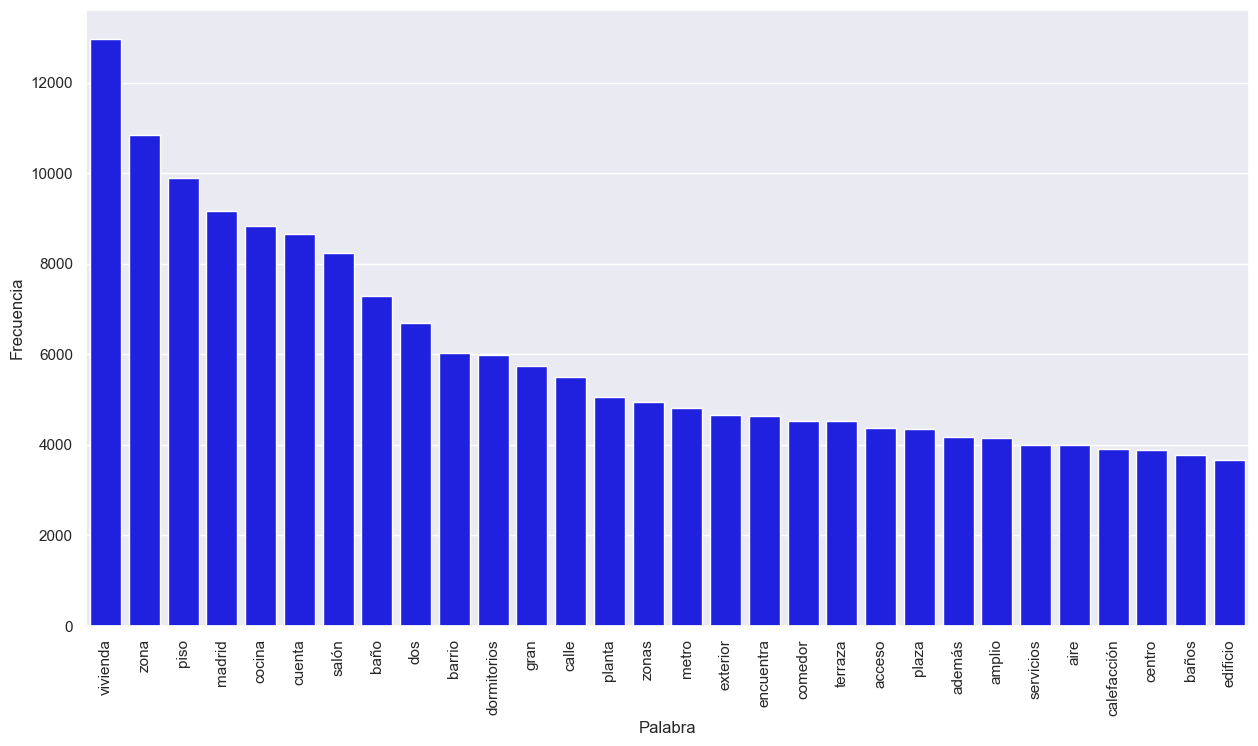

In [22]:
df_descripciones = get_descripciones(viviendas_nlp, stopwords)

En el análisis de las descripciones podemos observar como la frecuencia de las palabras no varía mucho entre ellas, lo cual nos indica que hay patrones muy similares entre las descripciones de cada anuncio, centrándose en características específicas de las viviendas como: 'Cocina', 'Salón', 'Baño'. Sin embargo, hay varias palabras que destacan por encima del resto: 'Vivienda', 'Zona', 'Piso'.